In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd


In [3]:
data = pd.read_csv("./telecom.csv")

In [4]:
data

,state,account length,area code,phone number,internationalplan,voicemailplan,number vmail messages,totaldayminutes,totaldaycalls,totaldaycharge,...,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,customerservicecalls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
X = data.iloc[:,6:20].values
Y=data.iloc[:,20].values

In [1]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=101)

NameError: name 'X' is not defined

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
clf = svm.SVC(probability=True)
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
clf.predict(X_test)

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
# get support vectors
clf.support_vectors_

array([[ 2.69898776, -0.58179662, -0.77107055, ...,  0.20176602,
         1.34427026, -0.4282781 ],
       [-0.58696273, -0.05858322,  0.73099299, ..., -0.6028835 ,
        -0.33500494,  1.8401777 ],
       [ 1.74971317, -0.67692633, -1.17162083, ..., -1.00520826,
         0.63024773,  1.08402577],
       ...,
       [-0.58696273,  1.67387515,  0.3805115 , ...,  0.20176602,
        -0.14988799,  0.32787383],
       [-0.58696273, -1.32271071,  1.98271261, ..., -0.6028835 ,
        -0.08377479,  1.8401777 ],
       [-0.58696273,  0.66952494,  0.28037393, ..., -1.00520826,
         2.37563614,  2.59632964]])

In [12]:
# get indices of support vectors
clf.support_

array([   0,    2,   10,   12,   15,   23,   40,   51,   55,   61,   62,
         63,   64,   69,   92,  103,  106,  117,  139,  140,  141,  160,
        171,  173,  174,  179,  196,  201,  206,  214,  221,  227,  228,
        234,  242,  244,  251,  252,  254,  255,  258,  268,  271,  272,
        275,  277,  279,  284,  288,  289,  303,  304,  309,  312,  320,
        328,  342,  343,  345,  357,  363,  367,  376,  379,  384,  389,
        399,  401,  404,  406,  407,  412,  418,  429,  444,  445,  448,
        455,  469,  480,  491,  494,  495,  497,  498,  500,  503,  506,
        507,  509,  511,  512,  513,  516,  517,  521,  522,  526,  531,
        543,  553,  557,  583,  585,  592,  594,  597,  604,  606,  612,
        613,  627,  631,  633,  640,  643,  656,  658,  665,  671,  672,
        685,  698,  707,  709,  717,  719,  722,  727,  730,  746,  756,
        761,  765,  767,  779,  784,  785,  787,  790,  795,  804,  805,
        806,  807,  830,  831,  834,  835,  836,  8

In [13]:
# get number of support vectors for each class
clf.n_support_

array([496, 347])

In [14]:
predicted_test = clf.predict(X_test)

In [17]:
accuracy_test = accuracy_score(Y_test,predicted_test)

In [18]:
accuracy_test

0.9175412293853074

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predicted_test))
print(classification_report(Y_test, predicted_test))

[[570   2]
 [ 53  42]]
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       572
        True       0.95      0.44      0.60        95

    accuracy                           0.92       667
   macro avg       0.93      0.72      0.78       667
weighted avg       0.92      0.92      0.90       667



In [42]:
y_probs = clf.predict_proba(X_test)

In [44]:
# keeping probabilities for the positive outcome only
y_probs = y_probs[:,1]

In [45]:
y_probs

array([0.04118461, 0.11931509, 0.15785193, 0.08776756, 0.13712445,
       0.02688234, 0.07931899, 0.25234993, 0.0261667 , 0.06422205,
       0.01777205, 0.89668693, 0.31942944, 0.18332713, 0.5876524 ,
       0.05135213, 0.03794722, 0.14401305, 0.07683962, 0.80561925,
       0.10574249, 0.0159956 , 0.02437865, 0.07680692, 0.01759499,
       0.03520862, 0.72098871, 0.02342005, 0.03109919, 0.0076248 ,
       0.04053098, 0.06800184, 0.06147826, 0.98145892, 0.03187375,
       0.03083565, 0.05382864, 0.02870671, 0.02883091, 0.14143449,
       0.40525383, 0.02126757, 0.12603966, 0.10962366, 0.43635903,
       0.09483848, 0.0352273 , 0.17218983, 0.85747968, 0.0431426 ,
       0.04399161, 0.01620801, 0.01196187, 0.01678189, 0.28204581,
       0.05176865, 0.01669571, 0.08540371, 0.12602192, 0.1740345 ,
       0.06005102, 0.03155196, 0.92409462, 0.12665017, 0.07526098,
       0.03825106, 0.08092915, 0.07263925, 0.05008886, 0.21379774,
       0.0385498 , 0.02344094, 0.26001585, 0.08913287, 0.01742

In [47]:
auc = roc_auc_score(Y_test,y_probs)

In [50]:
print('Support vector: ROC AUC=%.3f' % (auc))

Support vector: ROC AUC=0.874


In [51]:
sv_fpr,sv_tpr,_ = roc_curve(Y_test,y_probs)

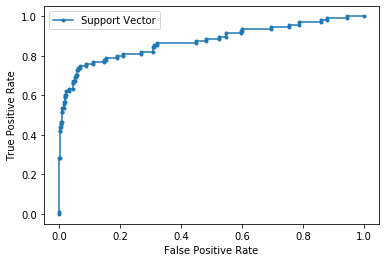

In [55]:
plt.plot(sv_fpr,sv_tpr,marker=".", label = "Support Vector")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [59]:
sv_precision, sv_recall, _ = precision_recall_curve(Y_test,y_probs)


In [68]:
# calculate f1 score
sv_f1 = f1_score(Y_test,predicted_test) 
print(sv_f1)

0.60431654676259


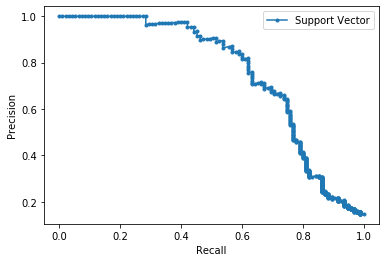

In [67]:
plt.plot(sv_recall, sv_precision, marker='.', label='Support Vector')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
